In [4]:
import pandas as pd

asthma_df = pd.read_csv('asthma.csv')
bronchi_df = pd.read_csv('bronchi.csv')
copd_df = pd.read_csv('copd.csv')

combined_df = pd.merge(asthma_df, bronchi_df, on=['pubchem_CID', 'IUPAC Name'], how='inner')
combined_df = pd.merge(combined_df, copd_df, on=['pubchem_CID', 'IUPAC Name'], how='inner')

asthma_values = combined_df.iloc[:, 2:55]   
bronchi_values = combined_df.iloc[:, 55:90] 
copd_values = combined_df.iloc[:, 90:]     

all_values = pd.concat([asthma_values, bronchi_values, copd_values], axis=1)

final_df = pd.concat([combined_df[['pubchem_CID', 'IUPAC Name']], all_values], axis=1)

value_columns = [str(i) for i in range(1, 122)]
final_df.columns = ['pubchem_CID', 'IUPAC Name'] + value_columns

final_df.to_csv('combined.csv', index=False)


C:\Users\neosa\AppData\Local\Temp\ipykernel_16336\2845457910.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Disease'].iloc[0:53] = 'Asthma'
C:\Users\neosa\AppData\Local\Temp\ipykernel_16336\2845457910.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Disease'].iloc[53:88] = 'Bronchi'
C:\Users\neosa\AppData\Local\Temp\ipykernel_16336\2845457910.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi

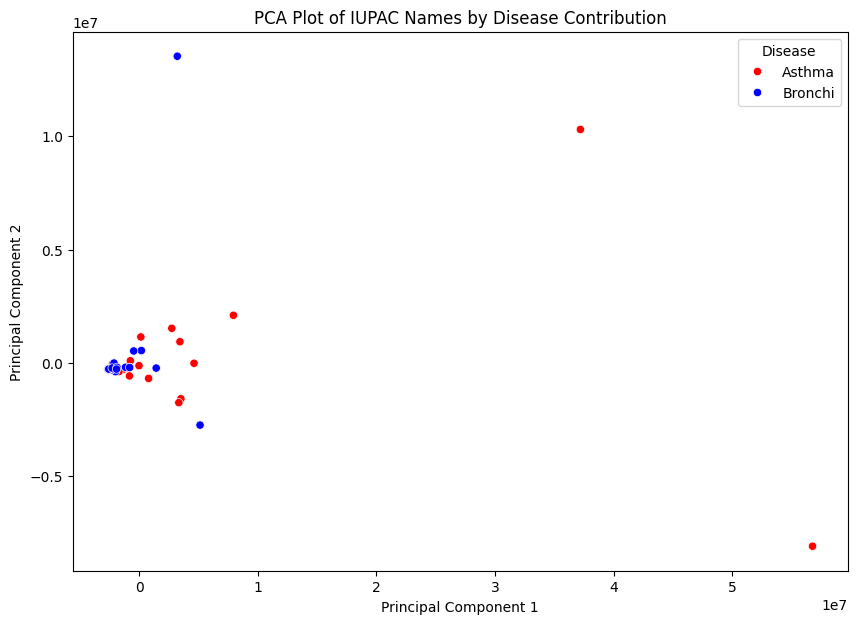

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

combined_df = pd.read_csv('combined.csv')

features = combined_df.iloc[:, 2:]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Step 2: Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Add PCA results back to combined_df
combined_df['PC1'] = pca_df['PC1']
combined_df['PC2'] = pca_df['PC2']

# Step 3: Assign colors based on the disease contribution
# Columns 1-53 (Asthma), 54-88 (Bronchi), 89-121 (COPD)
combined_df['Disease'] = ''
combined_df['Disease'].iloc[0:53] = 'Asthma'
combined_df['Disease'].iloc[53:88] = 'Bronchi'
combined_df['Disease'].iloc[88:121] = 'COPD'

# Step 4: Plot all IUPAC names, colored by disease
plt.figure(figsize=(10, 7))
sns.scatterplot(data=combined_df, x='PC1', y='PC2', hue='Disease', palette={'Asthma':'red', 'Bronchi':'blue', 'COPD':'green'})
plt.title('PCA Plot of IUPAC Names by Disease Contribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Disease')
plt.show()


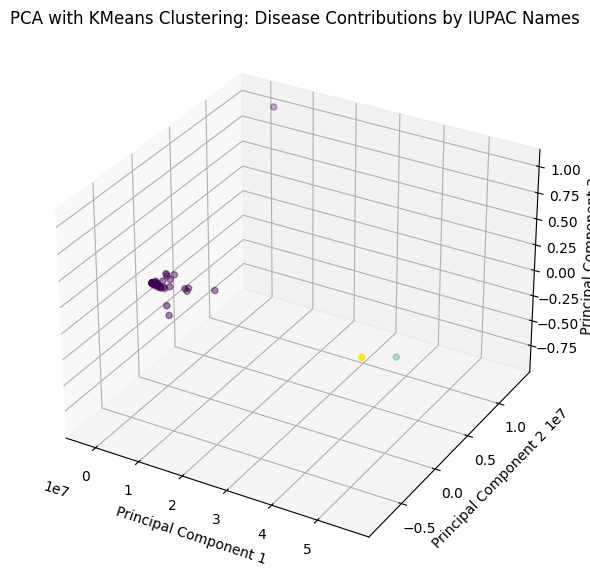

IndexError: positional indexers are out-of-bounds

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load the combined CSV file
combined_df = pd.read_csv('combined.csv')

# Extract the features (columns 3 onwards) for PCA and KMeans (since first two columns are 'pubchem_CID' and 'IUPAC Name')
features = combined_df.iloc[:, 2:]  # Columns with disease data (1-121 values)

# Step 1: Perform PCA to reduce to 3 principal components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Step 2: Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add PCA results back to combined_df
combined_df['PC1'] = pca_df['PC1']
combined_df['PC2'] = pca_df['PC2']
combined_df['PC3'] = pca_df['PC3']

# Step 3: Perform KMeans clustering to identify key disease-related IUPACs
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for 3 diseases
clusters = kmeans.fit_predict(features)

# Add the KMeans cluster results to the DataFrame
combined_df['Cluster'] = clusters

# Step 4: Define disease categories based on the column range
# Columns 1-53 for Asthma, 54-88 for Bronchi, and 89-121 for COPD
def assign_disease(row):
    if row.name < 53:
        return 'Asthma'
    elif row.name < 88:
        return 'Bronchi'
    else:
        return 'COPD'

combined_df['Disease'] = combined_df.apply(assign_disease, axis=1)

# Step 5: Plot the PCA results with KMeans clusters (3D plot for 3 disease clusters)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_df['PC1'], combined_df['PC2'], combined_df['PC3'], 
           c=combined_df['Cluster'], cmap='viridis')

ax.set_title('PCA with KMeans Clustering: Disease Contributions by IUPAC Names')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

# Step 6: Identify the main IUPAC names contributing to each disease
# Calculate PCA loading scores
loading_scores = pd.DataFrame(pca.components_.T, index=features.columns, columns=['PC1', 'PC2', 'PC3'])

# Get the top 10 features (columns) influencing each principal component
top_features_pc1 = loading_scores['PC1'].abs().sort_values(ascending=False).head(10).index
top_features_pc2 = loading_scores['PC2'].abs().sort_values(ascending=False).head(10).index
top_features_pc3 = loading_scores['PC3'].abs().sort_values(ascending=False).head(10).index

# Use the column names to retrieve the actual IUPAC names from the DataFrame
iupac_names = combined_df['IUPAC Name']

# Extract the top IUPAC names influencing PC1, PC2, and PC3 based on the feature indices
top_iupac_pc1 = iupac_names.iloc[top_features_pc1.astype(int) - 2]  # Adjusting index as 'IUPAC Name' starts at column 2
top_iupac_pc2 = iupac_names.iloc[top_features_pc2.astype(int) - 2]
top_iupac_pc3 = iupac_names.iloc[top_features_pc3.astype(int) - 2]

# Print the results
print("Top 10 IUPAC names influencing PC1 (main contributor to Asthma/Bronchi/COPD):")
print(top_iupac_pc1)

print("\nTop 10 IUPAC names influencing PC2 (main contributor to Asthma/Bronchi/COPD):")
print(top_iupac_pc2)

print("\nTop 10 IUPAC names influencing PC3 (main contributor to Asthma/Bronchi/COPD):")
print(top_iupac_pc3)
